# Titanic: Machine Learning from Disaster kaggle challange 


#### Contents
1. Problem definition
2. Acquire/Analyise training and testing data

### Problem definition

This is a challenge that has been acquired from Kaggle. In this challenge, we asked to discover what sorts of people were likely to survive. In particular, we are asked to apply the tools of machine learning to predict which passengers survived the tragedy.

* 1502 passengers died out of 2224 passengers
* Women, children and the upper-class were more likely to survive.

#### Goal - from Kaggle 
It is your job to predict if a passenger survived the sinking of the Titanic or not. 
For each PassengerId in the test set, you must predict a 0 or 1 value for the Survived variable.


In [2]:
# data analysis
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


### Acquire/Analyise  training and testing data

In [3]:
#import training and test csvs and convert to pandas dataframes 

df_train = pd.read_csv("Data/train.csv")
df_test = pd.read_csv("Data/test.csv")

In [4]:
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [6]:
df_test.count()

PassengerId    418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked       418
dtype: int64

In [7]:
print(pd.isnull(df_train).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [8]:
list(df_train.columns)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [9]:
df_train.shape


(891, 12)

In [10]:
df_test.shape

(418, 11)

We can see there is 891 samples with 11 features and the target dimension. Features Age, Cabin and Embarked are missing entries.  

Age is missing 177/714 = ~74% complete. Due to age most likley correlating highly with the target class surived, the nan values will have to be filled in. 

Cabin is missing 687/204 = ~30% complete. Since this feautre is missing so many values, It will have to discared.

Embarked is missing 2/889 =~97% complete. These values can be easily filled in. 

The test set is approx half the size of the training set.  

Feature descriptions and notes can be found [here](https://www.kaggle.com/c/titanic#description)


```
VARIABLE DESCRIPTIONS:
survival        Survival
                (0 = No; 1 = Yes)
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)

SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
Parent:   Mother or Father of Passenger Aboard Titanic
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.
```


In [11]:
#find datatypes

for col in df_train:
    print(col, df_train[col].dtypes)

PassengerId int64
Survived int64
Pclass int64
Name object
Sex object
Age float64
SibSp int64
Parch int64
Ticket object
Fare float64
Cabin object
Embarked object


* **Numerical Features:** Continous( Fare, Age) Discrete( Parch, Sibsp)
* **Catagorical Features:** Sex, Embarked, Pclass( Ordinal)
* **Alphanumeric Featrues:** Cabin, Ticket

In [12]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
df_train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Sedgwick, Mr. Charles Frederick Waddington",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


In [14]:
df_train.groupby('Survived').count()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,549,549,549,549,424,549,549,549,549,68,549
1,342,342,342,342,290,342,342,342,342,136,340


#### Assumptions 

We will have to determine which features correlate with the target class Survived. Feature selection will be performed later. 

Age and Embarked need to have some values filled in.

The features PassengerId, Ticket, Cabin and Name can all be dropped as they only provide unique values and will be no help to predicting the goal.( may cause overfitting) 

As stated in the notes on the kaggle page: 

Women had a higher probability of survival(Sex=female)
Children had a higher probability of survival(Age>?)
The upper-class had a higher probability of survival(Pclass=1)

~ 2/3 of the passengers perished in the sinking. We can assume that the baseline for a model would be predicting death which = 66%. So for our model to be successful we will have to predict over 66%


### Visualizations

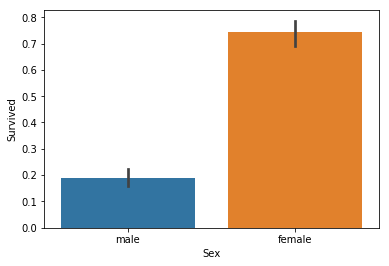

In [15]:
#Show a barplot of how men and women who surived 
sns.barplot(x='Sex', y='Survived', data=df_train)

We can see that women have much higher chance of surivial 


In [16]:
df_train.groupby('Sex').count()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,,
female,314,314,314,314,261,314,314,314,314,97,312
male,577,577,577,577,453,577,577,577,577,107,577


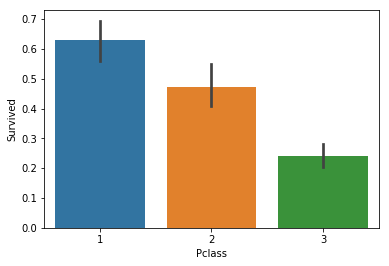

In [17]:
#Show a barplot of how pople survived in regard to class 
sns.barplot(x='Pclass', y='Survived', data=df_train)

We can see that the higher the class the higher the chance of survival 

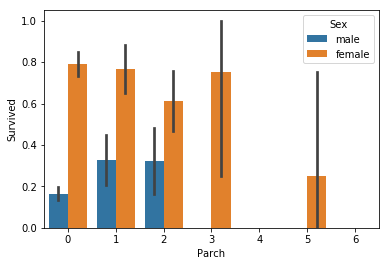

In [18]:
#Show a barplot of how pople with children and parents survived
sns.barplot(x='Parch', y='Survived', hue='Sex', data=df_train)

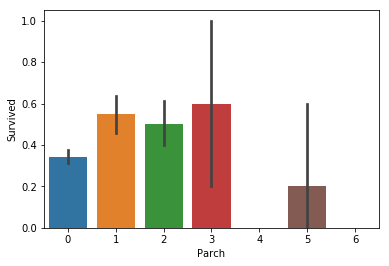

In [19]:
sns.barplot(x='Parch', y='Survived', data=df_train)

We can see that people(mainly women 65%) with between 1 to 3 sibblings had the highest chance of surviving. If you had no children or parents on board you only had a ~30% of survival. 

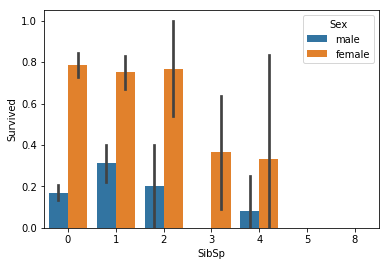

In [20]:
#Show a barplot of how pople with sibblings and spouses survived
sns.barplot(x='SibSp', y='Survived', hue='Sex', data=df_train)

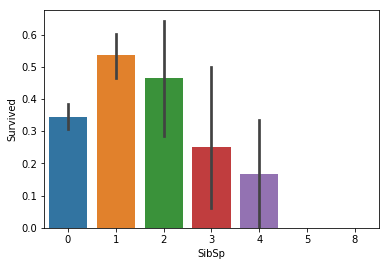

In [21]:
sns.barplot(x='SibSp', y='Survived', data=df_train)

We can see that people(mainly women 70%) with 1 sibbling or spouse had the highest chance of surviving. If you had no sibbling or spouse on board you only had a ~34% of survival.

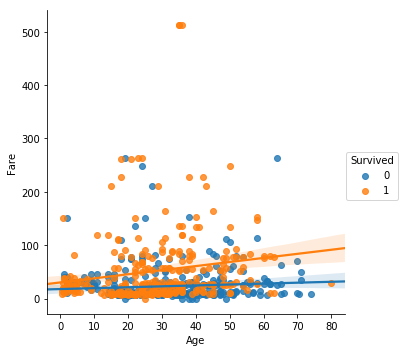

In [22]:
sns.lmplot(x='Age',y='Fare',hue='Survived',data=df_train)

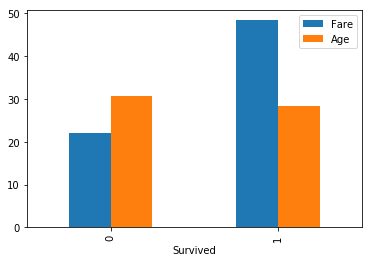

In [23]:
df_train.get(['Fare', 'Age', 'Survived']).groupby('Survived').mean().plot(kind='bar');

In general, we can identifiy that the higher the fare and the lower age have the highest chance of survival

In [24]:
filled_df_train = df_train.copy()
#print(df_train['Age'])
print(filled_df_train['Age'])

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5       NaN
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
17      NaN
18     31.0
19      NaN
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
26      NaN
27     19.0
28      NaN
29      NaN
       ... 
861    21.0
862    48.0
863     NaN
864    24.0
865    42.0
866    27.0
867    31.0
868     NaN
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
878     NaN
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64


In [25]:
#Fill in the missing values in Age with the overall medain of age.


print(df_train['Age'].count())
filled_df_train['Age'] = filled_df_train['Age'].fillna(-2)
print(df_train['Age'].count())
print(filled_df_train['Age'].count())


714
714
891


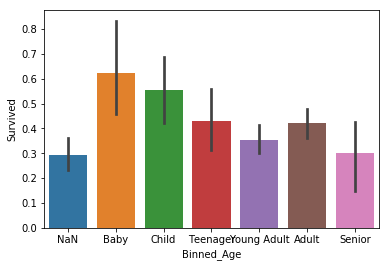

In [26]:
#bin the Age df
bins = [-3, 0, 2, 12, 18,30, 55, np.inf]
labels = ['NaN', 'Baby', 'Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']
filled_df_train['Binned_Age'] = pd.cut(filled_df_train['Age'], bins, labels = labels)

sns.barplot(x='Binned_Age',y='Survived',data=filled_df_train)

Babies and Children have the highest chance of surviving 

## Prepare and Cleanse the data

In [27]:
df_test.describe(include="all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Klasen, Miss. Gertrud Emilia",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


#### Dimension reduction
We are going to remove the features that do not add any value to our goal. Above we have identified Name, PassengerId, Cabin and Ticket.

We will need to kepp the PassengerId for the test set. 

In [28]:
df_train = df_train.drop(['Name','Cabin','Ticket','PassengerId'], axis=1)
df_test = df_test.drop(['Name','Cabin','Ticket'], axis=1)

#### Fill in missing values

In [29]:
print(pd.isnull(df_test).sum())

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64


We already know that Age and Embarked need to be completed for the training set. We can see here that Age and Fare need to be completed for the test set. 

In [30]:
#Fill empty values with the median of the age feature for test and train sets. 
train_age_median = df_train['Age'].dropna().median()
test_age_median = df_test['Age'].dropna().median()

df_train['Age'] = df_train['Age'].fillna(train_age_median)
df_test['Age'] = df_test['Age'].fillna(test_age_median)

print(df_train['Age'].count())
print(df_test['Age'].count())

891
418


In [31]:
test_fare_median = df_test['Fare'].dropna().median()
df_test['Fare'] = df_test['Fare'].fillna(test_fare_median)
print(pd.isnull(df_test).sum())

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


In [32]:
embarked = ['S', 'C', 'Q']
df_train['Embarked'] = df_train['Embarked'].fillna(rnd.choice(embarked))
df_train['Embarked'].count()

891

#### Convert catagorical features

In [33]:
#Convert sex to binary 
sex_dict = {'male' : 0, 'female' : 1}
df_train['Sex'] = df_train['Sex'].map(sex_dict)
df_test['Sex'] = df_test['Sex'].map(sex_dict)


In [34]:
#Convert Embarked 
embarked_dict = { 'S' : 0, 'C' : 1, 'Q' : 2}
df_train['Embarked'] = df_train['Embarked'].map(embarked_dict)
df_test['Embarked'] = df_test['Embarked'].map(embarked_dict)
df_train.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [35]:
#Convert Age

bins = [0, 2, 12, 18,30, 55, np.inf]
labels = [0, 1, 2, 3, 4, 5]
df_train['Binned_Age'] = pd.cut(df_train['Age'], bins, labels = labels)
df_test['Binned_Age'] = pd.cut(df_test['Age'], bins, labels = labels)



df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Binned_Age
0,0,3,0,22.0,1,0,7.2500,0,3
1,1,1,1,38.0,1,0,71.2833,1,4
2,1,3,1,26.0,0,0,7.9250,0,3
3,1,1,1,35.0,1,0,53.1000,0,4
4,0,3,0,35.0,0,0,8.0500,0,4


In [36]:
con_age_train = df_train['Age']
con_age_test = df_test['Age']

df_train = df_train.drop(['Age'], axis=1)
df_test = df_test.drop(['Age'], axis=1)

In [37]:
#Convert Fare to groups
df_train['Binned_Fare'] = pd.qcut(df_train['Fare'],5 , labels = [0,1,2,3,4]) 
df_test['Binned_Fare'] =  pd.qcut(df_test['Fare'],5 , labels = [0,1,2,3,4])

df_train = df_train.drop(['Fare'], axis=1)
df_test = df_test.drop(['Fare'], axis=1)

In [38]:
df_test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,Binned_Age,Binned_Fare
0,892,3,0,0,0,2,4,1
1,893,3,1,1,0,0,4,0
2,894,2,0,0,0,2,5,1
3,895,3,0,0,0,0,3,1
4,896,3,1,1,1,0,3,2


In [39]:
df_train.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Binned_Age,Binned_Fare
0,0,3,0,1,0,0,3,0
1,1,1,1,1,0,1,4,4
2,1,3,1,0,0,0,3,1
3,1,1,1,1,0,0,4,4
4,0,3,0,0,0,0,4,1


## Build Models

In [40]:
features = df_train.drop(['Survived'], axis=1).copy()
target = df_train['Survived'].copy()

features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.22, random_state=0)


In [41]:
print(features_train.shape, target_train.shape, features_test.shape, target_test.shape)


(694, 7) (694,) (197, 7) (197,)


In [42]:
logreg = LogisticRegression()
logreg.fit(features_train, target_train)
target_predicted = logreg.predict(features_test)
acc_log = (accuracy_score(target_test, target_predicted) *100, 2)
acc_log

(80.710659898477161, 2)

In [245]:
logreg.coef_

array([[-0.68493968,  2.51189168, -0.46438658, -0.12081246,  0.24181542,
        -0.44552364,  0.23712273]])

In [283]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

logreg = LogisticRegression()
scores = cross_val_score(logreg, features, target, cv=10, scoring='accuracy')
log_score = scores.mean
print("mean: {:.3f}".format(scores.mean()*100))

mean: 78.571


In [253]:
dt = DecisionTreeClassifier()
dt.fit(features_train, target_train)
target_predicted = dt.predict(features_test)
acc = (accuracy_score(target_test, target_predicted)*100)
acc

84.263959390862937

In [268]:
dt = DecisionTreeClassifier()
scores = cross_val_score(dt, features, target, cv=10, scoring='accuracy')
dt_score = (scores.mean()*100)
print("mean: {:.3f}".format(scores.mean()*100))

mean: 81.037


In [275]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(features_train, target_train)
target_predicted = knn.predict(features_test)
acc = (accuracy_score(target_test, target_predicted) *100)
acc

83.248730964467015

In [270]:
knn = KNeighborsClassifier(n_neighbors=20)
scores = cross_val_score(knn, features, target, cv=10, scoring='accuracy')
knn_score = (scores.mean()*100)
print("mean: {:.3f}".format(scores.mean()*100))

mean: 81.267


In [273]:
svc = SVC()
svc.fit(features_train, target_train)
target_predicted = svc.predict(features_test)
acc = (accuracy_score(target_test, target_predicted) *100)
acc

(81.725888324873097, 2)

In [272]:
svc = SVC()
scores = cross_val_score(svc, features, target, cv=10, scoring='accuracy')
svc_score = (scores.mean()*100)
print("mean: {:.3f}".format(scores.mean()*100))

mean: 82.490


In [289]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(features_train, target_train)
target_predicted = rf.predict(features_test)
acc = (accuracy_score(target_test, target_predicted) *100)
acc

84.771573604060919

In [278]:
rf = RandomForestClassifier()
scores = cross_val_score(rf, features, target, cv=10, scoring='accuracy')
rf_score = (scores.mean()*100)
print("mean: {:.3f}".format(scores.mean()*100))

mean: 81.827


In [321]:
gbk = GradientBoostingClassifier(learning_rate=0.3,max_depth=6,subsample=1)
gbk.fit(features_train, target_train)
#target_predicted = gbk.predict(features_test)
#acc = (accuracy_score(target_test, target_predicted) *100)
#acc

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [282]:
gbk = GradientBoostingClassifier()
scores = cross_val_score(rf, features, target, cv=10, scoring='accuracy')
gbk_score = (scores.mean()*100)
print("mean: {:.3f}".format(scores.mean()*100))

mean: 82.829


In [70]:
logreg = LogisticRegression()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier(n_neighbors=20)
svc = SVC()
rf = RandomForestClassifier(n_estimators=100)
gbk = GradientBoostingClassifier()

model=[logreg,dt,knn,svc,rf,gbk]
train_test_scores = []
for x in model:
    x.fit(features_train, target_train)
    target_predicted = x.predict(features_test)
    acc = (accuracy_score(target_test, target_predicted) *100)
    train_test_scores.append(acc) 
    print(acc)

80.7106598985
83.7563451777
83.2487309645
81.7258883249
84.7715736041
84.7715736041


In [305]:
logreg = LogisticRegression()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier(n_neighbors=20)
svc = SVC()
rf = RandomForestClassifier(n_estimators=100)
gbk = GradientBoostingClassifier()

model=[logreg,dt,knn,svc,rf,gbk]
cv_scores = []

for x in model:
    scores = cross_val_score(x, features, target, cv=10, n_jobs=-1, scoring='accuracy')
    score = (scores.mean()*100)
    cv_scores.append(score)
    print("mean: {:.3f}".format(scores.mean()*100))

mean: 78.571
mean: 80.807
mean: 81.267
mean: 82.490
mean: 82.837
mean: 82.610


In [323]:
score_dict = {'Models': model, 'Train/test slit acc': train_test_scores, 'CV scores': cv_scores}

df_scores = pd.DataFrame(data=d)
df_scores = df[['Models','Train/test slit acc','CV scores']]
df_scores

,Models,Train/test slit acc,CV scores
0,"LogisticRegression(C=1.0, class_weight=None, d...",80.710660,78.571360
1,"DecisionTreeClassifier(class_weight=None, crit...",84.263959,80.807258
2,"KNeighborsClassifier(algorithm='auto', leaf_si...",83.248731,81.266769
3,"SVC(C=1.0, cache_size=200, class_weight=None, ...",81.725888,82.490239
4,"RandomForestClassifier(bootstrap=True, class_w...",83.756345,82.837334
5,GradientBoostingClassifier(criterion='friedman...,84.771574,82.610146


In [369]:
rf = RandomForestClassifier()

params = {"max_depth": [3, None],
              "n_estimators": [100],
              "max_features": [0.5, 0.75, 1],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

gs = GridSearchCV(rf, params, cv=10, scoring='accuracy', n_jobs=-1)
gs.fit(features, target)

Wall time: 2min 13s


In [370]:
gs.best_score_

0.83277216610549942

In [371]:
gs.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 1,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 100}

In [357]:
#Test if feature selection helps improve score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X_new = SelectKBest(chi2, k=4).fit_transform(features, target)


X_new_test = SelectKBest(chi2, k=4).fit_transform(features_test, target_test)

In [355]:
#Testing 
logreg = LogisticRegression()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier(n_neighbors=20)
svc = SVC()
rf = RandomForestClassifier(n_estimators=100)
gbk = GradientBoostingClassifier()

model=[logreg,dt,knn,svc,rf,gbk]
train_test_scores = []
for x in model:
    x.fit(X_new, target_train)
    target_predicted = x.predict(X_new_test)
    acc = (accuracy_score(target_test, target_predicted) *100)
    train_test_scores.append(acc) 
    print(acc)

79.6954314721
82.7411167513
79.6954314721
79.6954314721
84.7715736041
83.2487309645


In [388]:
logreg = LogisticRegression()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier(n_neighbors=20)
svc = SVC()
rf = RandomForestClassifier(n_estimators=100)
gbk = GradientBoostingClassifier(learning_rate=0.1,max_depth=3,n_estimators=50)

model=[svc,rf,gbk]
cv_scores = []

for x in model:
    scores = cross_val_score(x, features, target, cv=10, n_jobs=-1, scoring='accuracy')
    score = (scores.mean()*100)
    cv_scores.append(score)
    print("mean: {:.3f}".format(scores.mean()*100))

mean: 82.490
mean: 82.276
mean: 82.943


In [383]:
rf = RandomForestClassifier(bootstrap=True,criterion='gini',max_depth=None,max_features=1,min_samples_leaf=1,min_samples_split=3,n_estimators=100)
scores = cross_val_score(rf, features, target, cv=10, scoring='accuracy')
rf_score = (scores.mean()*100)
print("mean: {:.3f}".format(scores.mean()*100))


mean: 82.614


mean: 82.834
